<a href="https://colab.research.google.com/github/Franklin-Selva/tensorflow-2.0-gothrough/blob/master/Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression Model**


In [1]:
!pip3 install -q sklearn

In [2]:
%tensorflow_version 2.x

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import clear_output
import tensorflow.compat.v2.feature_column as fc

In [3]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


In [4]:
print (dftrain.head())
print (y_train[:5])

      sex   age  n_siblings_spouses  parch  ...  class     deck  embark_town alone
0    male  22.0                   1      0  ...  Third  unknown  Southampton     n
1  female  38.0                   1      0  ...  First        C    Cherbourg     n
2  female  26.0                   0      0  ...  Third  unknown  Southampton     y
3  female  35.0                   1      0  ...  First        C  Southampton     n
4    male  28.0                   0      0  ...  Third  unknown   Queenstown     y

[5 rows x 9 columns]
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [5]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [6]:
dftrain.shape

(627, 9)

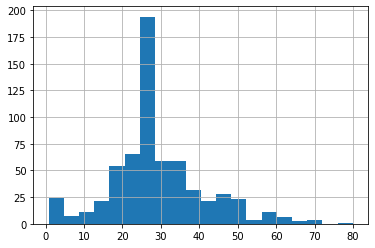

In [7]:
dftrain.age.hist(bins=20)

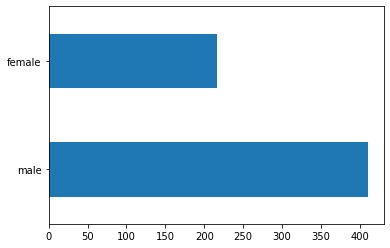

In [8]:
dftrain['sex'].value_counts().plot(kind='barh')

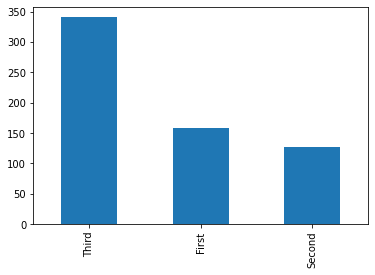

In [9]:
dftrain['class'].value_counts().plot(kind = 'bar')

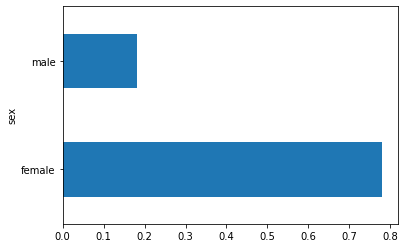

In [10]:
pd.concat([dftrain, y_train], axis = 1).groupby("sex").survived.mean().plot(kind = "barh")

In [11]:
#Preprocessing the dataset

CATEGORICAL_DATA = ["sex", "parch", "n_siblings_spouses", "class", "deck", "embark_town", "alone"]

NUMERICAL_DATA = ["age", "fare"]

feature_columns = []

for feature in CATEGORICAL_DATA:
  vocab = dftrain[feature].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature, vocab))

for feature in NUMERICAL_DATA:
  feature_columns.append(tf.feature_column.numeric_column(feature, dtype=tf.float32))

print (feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [12]:
# To convert the pandas dataframe to model readable format i.e. tf.data.Dataset()

def make_input_fn(data_df, label_df, num_epochs = 10, shuffle = True, batch_size = 5):

  def input_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))

    if shuffle:
      dataset = dataset.shuffle(1000)
    
    dataset = dataset.batch(batch_size).repeat(num_epochs)

    return dataset
  
  return input_function

train_function = make_input_fn(dftrain, y_train)
eval_function = make_input_fn(dfeval, y_eval, num_epochs = 2, batch_size = 5)


In [13]:
#Creating the model 

linear_estim =tf.estimator.LinearClassifier(feature_columns= feature_columns)

linear_estim.train(train_function)
result = linear_estim.evaluate(eval_function)

clear_output()
print ("Accuracy: ", result["accuracy"]*100, "%")

Accuracy:  77.65151262283325 %


In [14]:
#Predict Model

result = list(linear_estim.predict(eval_function)) # For now, usually test dunction goes here.

clear_output()

#Testing the model

id = 15 # Less than 200 pls.

print ("-"*50)
print (dfeval.loc[id])
print (y_eval.loc[id])
print (result[id]["probabilities"][1])

--------------------------------------------------
sex                        female
age                            16
n_siblings_spouses              5
parch                           2
fare                         46.9
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 15, dtype: object
0
0.7604471


### **Classification Model**

In [15]:
%tensorflow_version 2.x

from __future__ import absolute_import, print_function, unicode_literals
from IPython.display import clear_output

import tensorflow as tf
import pandas as pd

In [16]:
train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

COLUMN_NAMES = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
SPECIES = ["Setosa", "Versicolor", "Virginica"]

train = pd.read_csv(train_path, names = COLUMN_NAMES, header = 0)
test = pd.read_csv(test_path, names = COLUMN_NAMES, header = 0)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [17]:
print(train.head())
print(train.shape)

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0
(120, 5)


In [18]:
print (train.keys()) # Topics of the dataset

y_train = train.pop("Species")
y_test = test.pop("Species")

feature_columns = []


for key in train.keys():
  feature_columns.append(tf.feature_column.numeric_column(key = key))


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


In [19]:
#Input function
def input_fn(features, labels, training = True, batch_size = 256):
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

In [20]:
#Building the model

classifier = tf.estimator.DNNClassifier(hidden_units=[30, 10], feature_columns= feature_columns, n_classes = 3)

# Training event
classifier.train(input_fn = lambda: input_fn(train, y_train, training= True), steps = 5000)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp742huw47', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

In [21]:
# Evaluate the model

result = classifier.evaluate(input_fn= lambda: input_fn(test, y_test, training = False))

clear_output()

print (result["accuracy"])

0.96666664


In [29]:
def input_fn(features, batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)


features = train.keys()
predict = {}

print("Input numeical values as prompted")
for feature in features:
  valid = True
  while valid:
    val = input(feature + ":")
    if not val.isdigit(): valid = False

    predict[feature] = [float(val)]
    
prediction = classifier.predict(input_fn = lambda: input_fn(predict))
for pred_dict in prediction:
  # print (pred_dict)
  class_id = pred_dict["class_ids"][0]
  probablity = pred_dict["probabilities"][class_id]

  print ("Prediction is {} with {:.1f}%".format(SPECIES[class_id], 100* probablity))

Input numeical values as prompted
SepalLength:2.4
SepalWidth:2.1
PetalLength:.2
PetalWidth:6.3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp742huw47/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([0.1360029 , 0.5300667 , 0.51312345], dtype=float32), 'probabilities': array([0.25373787, 0.37629202, 0.3699701 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is Versicolor with 37.6%


### **Clustering**

In [30]:
%tensorflow_version 2.x
import tensorflow_probability as tfp
import tensorflow as tf

In [31]:
tfd = tfp.distributions

initial_distribution = tfd.Categorical([0.8, 0.2])
transition_distribution = tfd.Categorical([[0.7, 0.3], [0.2, 0.8]])
observation_distribution = tfd.Normal(loc = [0., 15.], scale = [5., 10.]) 
# loc represents the mean
# scale is the standard deviation


In [36]:
# Create the model
model = tfd.HiddenMarkovModel(initial_distribution= initial_distribution, 
                              transition_distribution = transition_distribution, 
                              observation_distribution = observation_distribution, 
                              num_steps = 7)

In [37]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
  print (mean.numpy())

[5.315155  7.318411  7.807895  7.927496  7.9567204 7.9638615 7.9656057]
